# Emission Measure Bin Width Testing

Need to resolve issue of how to calculate bin width. Should it be divided by the bin width? Run some tests with the single-fluid EBTEL code and our EM binner class to find out.

In [131]:
#Import needed modules
import sys
from imp import reload
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/wtb2/Documents/sunFM/')
sys.path.append('/home/wtb2/Documents/EBTEL_C/bin/')
import em_binner as eb
import ebtel_wrapper as ew
reload(eb)
reload(ew)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_wrapper' from '/home/wtb2/Documents/EBTEL_C/bin/ebtel_wrapper.py'>

First, set up the EBTEL run.

In [132]:
#input dictionary
config_dict = {'usage_option':'dem','rad_option':'rk','dem_option':'new','heat_flux_option':'classical',
              'solver':'euler','ic_mode':'st_eq','print_plasma_params':'True'}
config_dict['total_time'] = 5000
config_dict['tau'] = 1.0
config_dict['rka_error'] = 1.0e-6
config_dict['index_dem'] = 451
config_dict['sat_limit'] = 1.0/6.0
config_dict['h_back'] = 3.4e-6
config_dict['heating_shape'] = 'triangle'
config_dict['t_start_switch'] = 'uniform'
config_dict['t_end_switch'] = 'uniform'
config_dict['T0'] = 1.0e+6
config_dict['n0'] = 1.0e+8
config_dict['t_start'] = 0.0
config_dict['mean_t_start'] = 1000
config_dict['std_t_start'] = 1000
config_dict['amp_switch'] = 'uniform'
config_dict['amp0'] = 0.001
config_dict['amp1'] = 0.01
config_dict['alpha'] = 1.5
config_dict['loop_length'] = 40.0
config_dict['num_events'] = 1
config_dict['t_pulse_half'] = 100
config_dict['h_nano'] = 0.1
config_dict['output_file'] = '/home/wtb2/Documents/research_notebook/EBTEL/ebtel_data/em_bin_tests'

In [133]:
ew.print_xml_config(config_dict,config_file=config_dict['output_file']+'.xml')

Now, run the model and save the output.

In [134]:
ew.run_ebtel('/home/wtb2/Documents/EBTEL_C/bin/','',config_file=config_dict['output_file']+'.xml')

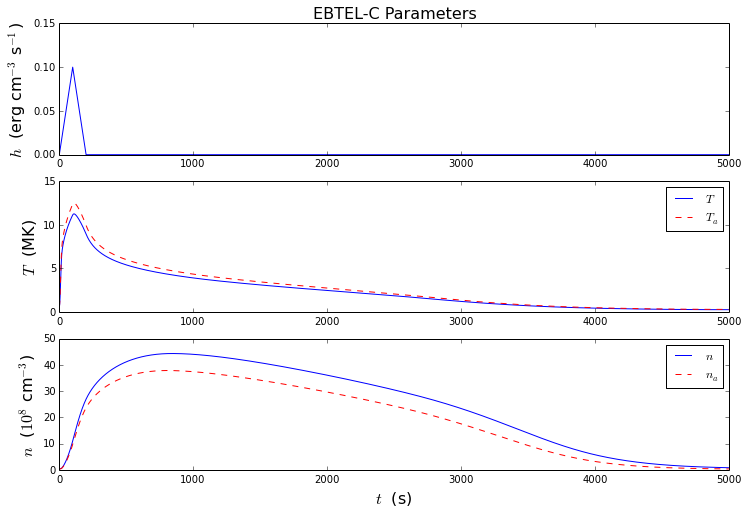

In [135]:
ew.plot_ebtel('',config_dict['output_file']+'.txt')

In [136]:
results = np.loadtxt(config_dict['output_file']+'.txt')
results_em = np.loadtxt(config_dict['output_file']+'_dem.txt')

Instantiate the binner class.

In [137]:
binner = eb.EM_Binner(results[:,0],results[:,1],results[:,2],2*config_dict['loop_length']*10**8)

In [145]:
binner.logT_bins(delta_logT=0.1)
binner.build_em_dist()

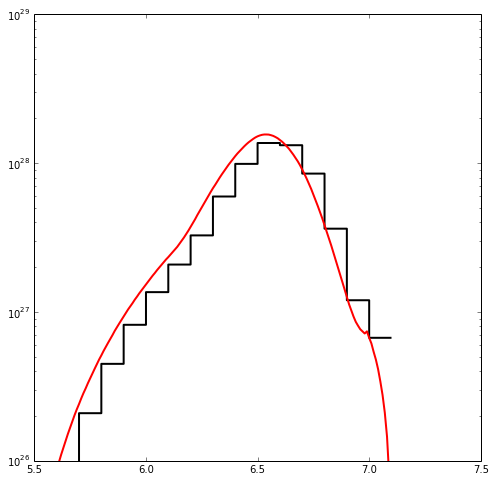

In [146]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.hist(binner.logT_em_flat,bins=binner.logT_EM_histo_bins,weights=np.array(binner.em_flat),
        histtype='step',linewidth=2,color='k')
ax.plot(results_em[:,0],10**results_em[:,4],color='r',linewidth=2)
ax.set_xlim([5.5,7.5])
ax.set_ylim([1e+26,1e+29])
ax.set_yscale('log')
plt.show()